In [1]:
import pandas as pd

import math

import numpy as np

import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

In [9]:
dat = yf.download(["MSFT", "AAPL", "NVDA", "GOOGL", "AMZN", "META"], period='5y')


*********************100%***********************]  6 of 6 completed

In [12]:
df = dat.head(10)

In [23]:
dat = dat["Close"]

In [24]:
dat

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA
Date,,,,,,
2020-02-14,81.237503,106.743500,75.936501,214.179993,185.350006,7.244750
2020-02-18,79.750000,107.783501,75.972000,217.800003,187.229996,7.414250
2020-02-19,80.904999,108.511002,76.243500,217.490005,187.279999,7.867500
2020-02-20,80.074997,107.654999,75.849503,214.580002,184.419998,7.717500
2020-02-21,78.262497,104.798500,74.172997,210.179993,178.589996,7.351750
...,...,...,...,...,...,...
2025-02-10,227.649994,233.139999,186.470001,717.400024,412.220001,133.570007
2025-02-11,232.619995,232.759995,185.320007,719.799988,411.440002,132.800003
2025-02-12,236.869995,228.929993,183.610001,725.380005,409.040009,131.139999


In [25]:
returns = dat.pct_change()

In [26]:
returns

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA
Date,,,,,,
2020-02-14,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,-0.018311,0.009743,0.000467,0.016902,0.010143,0.023396
2020-02-19,0.014483,0.006750,0.003574,-0.001423,0.000267,0.061132
2020-02-20,-0.010259,-0.007889,-0.005168,-0.013380,-0.015271,-0.019066
2020-02-21,-0.022635,-0.026534,-0.022103,-0.020505,-0.031613,-0.047392
...,...,...,...,...,...,...
2025-02-10,0.000088,0.017412,0.006097,0.004031,0.006028,0.028728
2025-02-11,0.021832,-0.001630,-0.006167,0.003345,-0.001892,-0.005765
2025-02-12,0.018270,-0.016455,-0.009227,0.007752,-0.005833,-0.012500


In [29]:
rolling_covariance = returns.rolling(window=30).cov()

In [37]:
rolling_covariance = rolling_covariance.iloc[30*6:, :]

In [39]:
annualized_covariance = rolling_covariance*12

In [42]:
weights = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

In [43]:
portfolio_variance = annualized_covariance.groupby(level=0).apply(lambda x: weights @ x.values @ weights.T)

In [44]:
portfolio_variance

Date
2020-03-30    0.033785
2020-03-31    0.033731
2020-04-01    0.034267
2020-04-02    0.034472
2020-04-03    0.034347
                ...   
2025-02-10    0.002902
2025-02-11    0.002899
2025-02-12    0.002816
2025-02-13    0.002840
2025-02-14    0.002777
Length: 1228, dtype: float64

In [58]:
portfolio_variance = portfolio_variance.apply(np.sqrt)

In [59]:
portfolio_variance

Date
2020-03-30    0.183808
2020-03-31    0.183659
2020-04-01    0.185113
2020-04-02    0.185665
2020-04-03    0.185330
                ...   
2025-02-10    0.053870
2025-02-11    0.053843
2025-02-12    0.053069
2025-02-13    0.053295
2025-02-14    0.052701
Length: 1228, dtype: float64

In [73]:
portfolio_variance = portfolio_variance.to_frame()

In [71]:
portfolio_variance = portfolio_variance[0]

In [79]:
portfolio_variance = portfolio_variance.reset_index()

In [80]:
portfolio_variance

,Date,0
0,2020-03-30,0.183808
1,2020-03-31,0.183659
2,2020-04-01,0.185113
3,2020-04-02,0.185665
4,2020-04-03,0.185330
...,...,...
1223,2025-02-10,0.053870
1224,2025-02-11,0.053843
1225,2025-02-12,0.053069
1226,2025-02-13,0.053295


In [83]:
portfolio_variance.columns

Index(['Date', 0], dtype='object')

In [90]:
portfolio_variance.rename(columns={0: 'basket_vol', 'Date':'date'}, inplace=True)

In [91]:
portfolio_variance

,date,basket_vol
0,2020-03-30,0.183808
1,2020-03-31,0.183659
2,2020-04-01,0.185113
3,2020-04-02,0.185665
4,2020-04-03,0.185330
...,...,...
1223,2025-02-10,0.053870
1224,2025-02-11,0.053843
1225,2025-02-12,0.053069
1226,2025-02-13,0.053295


In [64]:
options = pd.read_parquet('options_prices_2020_2023 (1).parquet')

In [65]:
options

,date,secid,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta
0,2023-01-03,101310.0,AMZN 230203C100000,2023-02-03,C,100000.0,1.13,1.24,0.518193,0.180449,0.020279,6.573099,-20.64159
1,2023-01-03,101310.0,AMZN 230203C101000,2023-02-03,C,101000.0,0.99,1.1,0.517512,0.163279,0.019051,6.167326,-19.3229
2,2023-01-03,101310.0,AMZN 230203C102000,2023-02-03,C,102000.0,0.89,0.98,0.51952,0.148764,0.017848,5.791956,-18.22698
3,2023-01-03,101310.0,AMZN 230203C103000,2023-02-03,C,103000.0,0.79,0.89,0.522221,0.135744,0.016688,5.445606,-17.20464
4,2023-01-03,101310.0,AMZN 230203C104000,2023-02-03,C,104000.0,0.69,0.79,0.522084,0.122306,0.015528,5.073944,-15.98841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463048,2020-12-30,203876.0,GOOG 210129P1785000,2021-01-29,P,1785000.0,74.2,82.1,0.260143,-0.620739,0.002934,189.6917,-298.7956
463049,2020-12-30,203876.0,GOOG 210129P1787500,2021-01-29,P,1787500.0,75.8,83.3,0.258914,-0.628577,0.002929,188.456,-295.4007
463050,2020-12-30,203876.0,GOOG 210129P1790000,2021-01-29,P,1790000.0,77.4,84.9,0.258647,-0.635838,0.002913,187.2582,-293.1511
463051,2020-12-30,203876.0,GOOG 210129P1792500,2021-01-29,P,1792500.0,79.0,87.1,0.259898,-0.642094,0.002881,186.1764,-292.8073


In [107]:
options = options[options['cp_flag']=="C"]

In [ ]:
options = options[options['cp_flag']=="C"]

In [111]:
options.head(48)

,date,secid,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta
0,2023-01-03,101310.0,AMZN 230203C100000,2023-02-03,C,100000.0,1.13,1.24,0.518193,0.180449,0.020279,6.573099,-20.64159
1,2023-01-03,101310.0,AMZN 230203C101000,2023-02-03,C,101000.0,0.99,1.1,0.517512,0.163279,0.019051,6.167326,-19.3229
2,2023-01-03,101310.0,AMZN 230203C102000,2023-02-03,C,102000.0,0.89,0.98,0.51952,0.148764,0.017848,5.791956,-18.22698
3,2023-01-03,101310.0,AMZN 230203C103000,2023-02-03,C,103000.0,0.79,0.89,0.522221,0.135744,0.016688,5.445606,-17.20464
4,2023-01-03,101310.0,AMZN 230203C104000,2023-02-03,C,104000.0,0.69,0.79,0.522084,0.122306,0.015528,5.073944,-15.98841
5,2023-01-03,101310.0,AMZN 230203C105000,2023-02-03,C,105000.0,0.61,0.7,0.522878,0.110398,0.014419,4.715231,-14.88024
6,2023-01-03,101310.0,AMZN 230203C106000,2023-02-03,C,106000.0,0.54,0.64,0.526137,0.100674,0.013406,4.408833,-13.99726
7,2023-01-03,101310.0,AMZN 230203C107000,2023-02-03,C,107000.0,0.48,0.58,0.528992,0.091604,0.01244,4.117414,-13.12095
8,2023-01-03,101310.0,AMZN 230203C108000,2023-02-03,C,108000.0,0.43,0.52,0.53154,0.083187,0.011522,3.831599,-12.26203
9,2023-01-03,101310.0,AMZN 230203C109000,2023-02-03,C,109000.0,0.39,0.47,0.535254,0.07602,0.010688,3.57321,-11.5274


In [116]:
options = options[options['secid']==108105.0]

In [118]:
agg_options = options[['date', 'impl_volatility']].groupby(['date']).min()

In [121]:
agg_options = agg_options.reset_index()

In [108]:
options

,date,secid,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,delta,gamma,vega,theta
0,2023-01-03,101310.0,AMZN 230203C100000,2023-02-03,C,100000.0,1.13,1.24,0.518193,0.180449,0.020279,6.573099,-20.64159
1,2023-01-03,101310.0,AMZN 230203C101000,2023-02-03,C,101000.0,0.99,1.1,0.517512,0.163279,0.019051,6.167326,-19.3229
2,2023-01-03,101310.0,AMZN 230203C102000,2023-02-03,C,102000.0,0.89,0.98,0.51952,0.148764,0.017848,5.791956,-18.22698
3,2023-01-03,101310.0,AMZN 230203C103000,2023-02-03,C,103000.0,0.79,0.89,0.522221,0.135744,0.016688,5.445606,-17.20464
4,2023-01-03,101310.0,AMZN 230203C104000,2023-02-03,C,104000.0,0.69,0.79,0.522084,0.122306,0.015528,5.073944,-15.98841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462943,2020-12-30,203876.0,GOOG 210129C2260000,2021-01-29,C,2260000.0,0.0,0.95,0.370787,0.008,0.000119,10.95834,-24.70411
462944,2020-12-30,203876.0,GOOG 210129C2270000,2021-01-29,C,2270000.0,0.0,0.9,0.373863,0.00756,0.000112,10.43227,-23.70118
462945,2020-12-30,203876.0,GOOG 210129C2280000,2021-01-29,C,2280000.0,0.0,0.9,0.379228,0.007466,0.000109,10.31781,-23.7766
462946,2020-12-30,203876.0,GOOG 210129C2290000,2021-01-29,C,2290000.0,0.0,0.85,0.38206,0.007041,0.000103,9.795554,-22.74742


In [104]:
list(set(options['secid']))

[np.float64(108321.0),
 np.float64(154402.0),
 np.float64(203876.0),
 np.float64(107525.0),
 np.float64(108105.0),
 np.float64(143439.0),
 np.float64(101594.0),
 np.float64(101310.0)]

In [88]:
options.date

0         2023-01-03
1         2023-01-03
2         2023-01-03
3         2023-01-03
4         2023-01-03
             ...    
463048    2020-12-30
463049    2020-12-30
463050    2020-12-30
463051    2020-12-30
463052    2020-12-30
Name: date, Length: 1963053, dtype: string

In [97]:
portfolio_variance.date

0       2020-03-30
1       2020-03-31
2       2020-04-01
3       2020-04-02
4       2020-04-03
           ...    
1223    2025-02-10
1224    2025-02-11
1225    2025-02-12
1226    2025-02-13
1227    2025-02-14
Name: date, Length: 1228, dtype: object

In [96]:
portfolio_variance['date'] = portfolio_variance['date'].apply(lambda x: str(x))

In [122]:
dispersion = pd.merge(portfolio_variance, agg_options, on='date', how='inner')

In [123]:
dispersion

,date,basket_vol,impl_volatility
0,2020-03-30,0.183808,0.333387
1,2020-03-31,0.183659,0.293497
2,2020-04-01,0.185113,0.337778
3,2020-04-02,0.185665,0.305277
4,2020-04-03,0.185330,0.289133
...,...,...,...
858,2023-08-25,0.048605,0.104468
859,2023-08-28,0.048843,0.10343
860,2023-08-29,0.050996,0.100952
861,2023-08-30,0.051107,0.098254


In [126]:
import matplotlib.dates as mdates

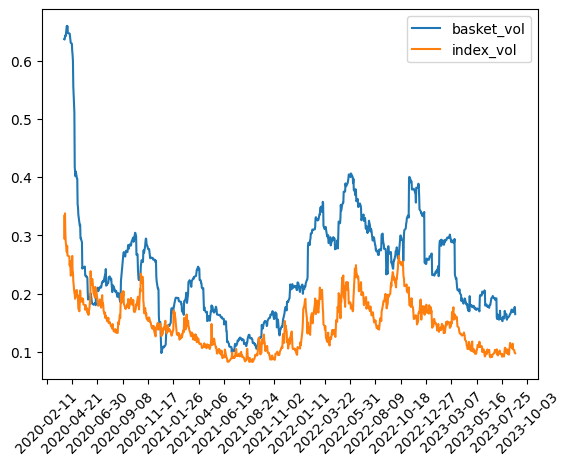

In [135]:
fig, ax = plt.subplots()

dates = pd.to_datetime(list(dispersion['date']))
ax.plot(dates, dispersion['basket_vol']*math.sqrt(12), label='basket_vol')
ax.plot(dates, dispersion['impl_volatility'], label='index_vol')


# Set x-axis ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))

# Format date display
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.legend()

plt.show()

In [61]:
0.052701**2

0.002777395401

In [54]:
annualized_covariance.tail(6)

Ticker                 AAPL      AMZN     GOOGL      META      MSFT      NVDA
Date       Ticker                                                            
2025-02-14 AAPL    0.004405  0.001212  0.000934  0.000994  0.001323  0.000727
           AMZN    0.001212  0.003043  0.002736  0.001110  0.001888  0.002811
           GOOGL   0.000934  0.002736  0.005589  0.001356  0.000856  0.004159
           META    0.000994  0.001110  0.001356  0.002495  0.000558  0.001795
           MSFT    0.001323  0.001888  0.000856  0.000558  0.003696  0.005096
           NVDA    0.000727  0.002811  0.004159  0.001795  0.005096  0.025649

In [55]:
matrix = np.array([
    [0.004405,	0.001212,	0.000934,	0.000994,	0.001323,	0.000727],
    [0.001212, 0.003043, 0.002736, 0.001110, 0.001888, 0.002811],
    [0.000934, 0.002736, 0.005589, 0.001356, 0.000856, 0.004159],
    [0.000994, 0.001110, 0.001356, 0.002495, 0.000558, 0.001795],
    [0.001323, 0.001888, 0.000856, 0.000558, 0.003696, 0.005096],
    [0.000727, 0.002811, 0.004159, 0.001795, 0.005096, 0.025649]
])

In [56]:
np.matmul(weights, np.matmul(matrix, weights.T))

np.float64(0.0027774166666666663)

In [11]:
data = {'Category1': ['A', 'A', 'B', 'B', 'A', 'C'],
        'Category2': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
        'Value': [10, 15, 20, 25, 30, 35]}
df = pd.DataFrame(data)

sum_by_multi_category = df.groupby(['Category1', 'Category2'])['Value'].sum()
print(sum_by_multi_category)

Category1  Category2
A          X            40
           Y            15
B          X            20
           Y            25
C          Y            35
Name: Value, dtype: int64


In [10]:
dat.columns

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'MSFT'),
            ('Adj Close',  'NVDA'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'MSFT'),
            (    'Close',  'NVDA'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'MSFT'),
            (     'High',  'NVDA'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'MSFT'),
            (      'Low',  'NVDA'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  '

In [8]:
dat=yf.Ticker("MSFT")

dat.history(period="1mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-14 00:00:00-05:00,417.809998,419.739990,410.720001,415.670013,16935900,0.0,0.0
2025-01-15 00:00:00-05:00,419.130005,428.149994,418.269989,426.309998,19637800,0.0,0.0
2025-01-16 00:00:00-05:00,428.700012,429.489990,424.390015,424.579987,15300000,0.0,0.0
2025-01-17 00:00:00-05:00,434.089996,434.480011,428.170013,429.029999,26197500,0.0,0.0
2025-01-21 00:00:00-05:00,430.200012,430.899994,425.600006,428.500000,26085700,0.0,0.0
2025-01-22 00:00:00-05:00,437.559998,447.269989,436.000000,446.200012,27803800,0.0,0.0
2025-01-23 00:00:00-05:00,442.000000,446.750000,441.500000,446.709991,18389300,0.0,0.0
2025-01-24 00:00:00-05:00,445.160004,446.649994,441.399994,444.059998,15549500,0.0,0.0
2025-01-27 00:00:00-05:00,424.010010,435.200012,423.500000,434.559998,35647800,0.0,0.0
